In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#read data into dataframe
data_population = pd.read_excel('Resources/Nicoles_population_data.xlsx')
data_temperature = pd.read_excel('Resources/Nicoles_temperature_data.xlsx')



In [3]:
# Display population columns 
print(data_population.columns) 
data_population.head(5)


Index(['SERIES', 'NMFS_POPID', 'RECOVERY_DOMAIN', 'ESU',
       'MAJOR_POPULATION_GROUP', 'POPULATION_NAME', 'COMMON_POPULATION_NAME',
       'DISPLAY_ORDER', 'SPECIES', 'RUN_TIMING', 'Species/Run', 'STREAM_NAME',
       'YEAR', 'NUMBER_OF_SPAWNERS', 'FRACWILD', 'CATCH', 'AGE_1_RETURNS',
       'AGE_2_RETURNS', 'AGE_3_RETURNS', 'AGE_4_RETURNS', 'AGE_5_RETURNS',
       'AGE_6_RETURNS', 'AGE_7_RETURNS', 'METHOD', 'CITATION', 'CONTRIBUTOR',
       'DOCUMENT_CITATION', 'CODE_LINK'],
      dtype='object')


,SERIES,NMFS_POPID,RECOVERY_DOMAIN,ESU,MAJOR_POPULATION_GROUP,POPULATION_NAME,COMMON_POPULATION_NAME,DISPLAY_ORDER,SPECIES,RUN_TIMING,...,AGE_3_RETURNS,AGE_4_RETURNS,AGE_5_RETURNS,AGE_6_RETURNS,AGE_7_RETURNS,METHOD,CITATION,CONTRIBUTOR,DOCUMENT_CITATION,CODE_LINK
0,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,Chinook,Fall,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,Lower Columbia River Chinook Natural Origin Sp...,Oregon Department of Fish and Wildlife,NaN,NaN
1,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,Chinook,Fall,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,Lower Columbia River Chinook Natural Origin Sp...,Oregon Department of Fish and Wildlife,NaN,NaN
2,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,Chinook,Fall,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,Lower Columbia River Chinook Natural Origin Sp...,Oregon Department of Fish and Wildlife,NaN,NaN
3,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,Chinook,Fall,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,Lower Columbia River Chinook Natural Origin Sp...,Oregon Department of Fish and Wildlife,NaN,NaN
4,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,Chinook,Fall,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,Lower Columbia River Chinook Natural Origin Sp...,Oregon Department of Fish and Wildlife,NaN,NaN


In [4]:
#Show temperature columns 
print(data_temperature.columns)
data_temperature.head(5)

Index(['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE',
       'YEAR', 'Run-Time'],
      dtype='object')


,REGION,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE,YEAR,Run-Time
0,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.8,2013-01-01,2013,Winter
1,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.4,2013-01-02,2013,Winter
2,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.9,2013-01-03,2013,Winter
3,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.7,2013-01-04,2013,Winter
4,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.5,2013-01-05,2013,Winter


In [5]:
# Display unique values for population data 
data_population.nunique()

SERIES                      22
NMFS_POPID                 226
RECOVERY_DOMAIN              4
ESU                         17
MAJOR_POPULATION_GROUP      44
POPULATION_NAME            203
COMMON_POPULATION_NAME     168
DISPLAY_ORDER              113
SPECIES                      6
RUN_TIMING                  10
Species/Run                 18
STREAM_NAME                132
YEAR                        83
NUMBER_OF_SPAWNERS        4213
FRACWILD                  1134
CATCH                     1145
AGE_1_RETURNS               15
AGE_2_RETURNS             1258
AGE_3_RETURNS             1862
AGE_4_RETURNS             1868
AGE_5_RETURNS             1385
AGE_6_RETURNS               99
AGE_7_RETURNS               39
METHOD                       4
CITATION                   139
CONTRIBUTOR                 20
DOCUMENT_CITATION          801
CODE_LINK                    1
dtype: int64

In [6]:
# Display unique values for temp data 
data_temperature.nunique()

REGION                      3
SITE NAME                   8
SITE_NUMBER                 8
DAILY_MEAN_WATER_TEMP     255
DATE                     4017
YEAR                       11
Run-Time                    4
dtype: int64

In [7]:
# Convert all values in the 'SPECIES' column to uppercase
data_population['SPECIES'] = data_population['SPECIES'].str.upper()

# Convert all values in the 'RUN_TIMING' column to uppercase
data_population['RUN_TIMING'] = data_population['RUN_TIMING'].str.upper()


In [8]:
# Drop unnecessary columns
columns_to_drop = ['CITATION', 'CONTRIBUTOR', 'DOCUMENT_CITATION', 'CODE_LINK', 'CATCH']
data_population = data_population.drop(columns=columns_to_drop)

In [9]:
# Rename 'Recovery Domain' to 'Region' in Population Data
data_population = data_population.rename(columns={'RECOVERY_DOMAIN': 'REGION'})


In [10]:
# Rename Year
data_population_cleaned = data_population.rename(columns={'Year': 'YEAR'})



In [11]:
# Rename Run-Time 
data_temperature_cleaned = data_temperature.rename(columns={'Date MM/DD/YYYY': 'DATE', 'Run-Time': 'RUN_TIMING'})

In [12]:
# Convert all values in the 'RUN_TIMING' column to uppercase
data_temperature_cleaned['RUN_TIMING'] = data_temperature_cleaned['RUN_TIMING'].str.upper()

In [13]:
# Display cleaned population data
print(data_population_cleaned.columns)
data_population_cleaned.head()


Index(['SERIES', 'NMFS_POPID', 'REGION', 'ESU', 'MAJOR_POPULATION_GROUP',
       'POPULATION_NAME', 'COMMON_POPULATION_NAME', 'DISPLAY_ORDER', 'SPECIES',
       'RUN_TIMING', 'Species/Run', 'STREAM_NAME', 'YEAR',
       'NUMBER_OF_SPAWNERS', 'FRACWILD', 'AGE_1_RETURNS', 'AGE_2_RETURNS',
       'AGE_3_RETURNS', 'AGE_4_RETURNS', 'AGE_5_RETURNS', 'AGE_6_RETURNS',
       'AGE_7_RETURNS', 'METHOD'],
      dtype='object')


,SERIES,NMFS_POPID,REGION,ESU,MAJOR_POPULATION_GROUP,POPULATION_NAME,COMMON_POPULATION_NAME,DISPLAY_ORDER,SPECIES,RUN_TIMING,...,NUMBER_OF_SPAWNERS,FRACWILD,AGE_1_RETURNS,AGE_2_RETURNS,AGE_3_RETURNS,AGE_4_RETURNS,AGE_5_RETURNS,AGE_6_RETURNS,AGE_7_RETURNS,METHOD
0,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,1096.0,0.050,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
1,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,946.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
2,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,2583.0,0.016,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
3,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,1279.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
4,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,582.0,0.077,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey


In [14]:
# Display stream names 
data_population_cleaned['STREAM_NAME'].unique()

array(['Big Creek tributaries', 'White   River', 'Clackamas River',
       'Clatskanie River', 'Coweeman River', 'Elochoman River',
       'Grays River', 'Kalama River', 'Lewis River',
       'Lower Cowlitz River', 'Lower Gorge Tributaries', 'Mill Creek',
       'North Fork Lewis River', 'Sandy River', 'Toutle River',
       'Upper Cowlitz River', 'Upper Gorge Tributaries',
       'Washougal River', 'Youngs River and tributaries', nan,
       'Snake River', 'Bear Valley Creek', 'Big Creek', 'Big Sheep Creek',
       'Camas Creek', 'Catherine Creek', 'Chamberlain Creek',
       'East Fork   River', 'Johnson Creek', 'Grande Ronde River',
       'Grande Ronde Upper Mainstem', 'Imnaha River', 'Lemhi River',
       'Little   River', 'Lookingglass Creek', 'Loon Creek',
       'Marsh Creek', 'Middle Fork   River below Indian Creek',
       'Middle Fork   River above Indian Creek', 'Minam River',
       'North Fork   River', 'Pahsimeroi River', 'Panther Creek',
       '  River Lower Mainstem b

In [15]:
# Display temperature data 
print(data_temperature_cleaned.columns)
data_temperature_cleaned.head()

Index(['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE',
       'YEAR', 'RUN_TIMING'],
      dtype='object')


,REGION,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE,YEAR,RUN_TIMING
0,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.8,2013-01-01,2013,WINTER
1,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.4,2013-01-02,2013,WINTER
2,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.9,2013-01-03,2013,WINTER
3,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.7,2013-01-04,2013,WINTER
4,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.5,2013-01-05,2013,WINTER


In [16]:
# Display site names 
data_temperature_cleaned['SITE NAME'].unique()

array(['Willamette River at Portland, OR',
       'Deschutes River nr Culver, OR',
       'Willamette River at Owosso Bridge at Eugene, OR',
       'Columbia River at The Dalles, OR',
       'North Fork Clearwater River at Ahsahka, ID',
       'Snake River below Lower Monumental Dam, WA',
       'N. Umpqua River ab Copeland Ck nr Toketee Falls, OR',
       'N. Umpqua River near Idleyld Park, OR'], dtype=object)

In [17]:
# Export the cleaned population data to a CSV file
data_population_cleaned.to_csv('cleaned_population_data.csv', index=False)

# Export the cleaned temperature data to a CSV file
data_temperature_cleaned.to_csv('cleaned_temperature_data.csv', index=False)


In [18]:
# Merge the DataFrames on 'Region','Year', and RUN_TIMING
merged_data = pd.merge(data_population_cleaned, data_temperature_cleaned, how='inner', on=['REGION', 'YEAR', 'RUN_TIMING'])
print(merged_data.columns)
merged_data.head()

Index(['SERIES', 'NMFS_POPID', 'REGION', 'ESU', 'MAJOR_POPULATION_GROUP',
       'POPULATION_NAME', 'COMMON_POPULATION_NAME', 'DISPLAY_ORDER', 'SPECIES',
       'RUN_TIMING', 'Species/Run', 'STREAM_NAME', 'YEAR',
       'NUMBER_OF_SPAWNERS', 'FRACWILD', 'AGE_1_RETURNS', 'AGE_2_RETURNS',
       'AGE_3_RETURNS', 'AGE_4_RETURNS', 'AGE_5_RETURNS', 'AGE_6_RETURNS',
       'AGE_7_RETURNS', 'METHOD', 'SITE NAME', 'SITE_NUMBER',
       'DAILY_MEAN_WATER_TEMP', 'DATE'],
      dtype='object')


,SERIES,NMFS_POPID,REGION,ESU,MAJOR_POPULATION_GROUP,POPULATION_NAME,COMMON_POPULATION_NAME,DISPLAY_ORDER,SPECIES,RUN_TIMING,...,AGE_3_RETURNS,AGE_4_RETURNS,AGE_5_RETURNS,AGE_6_RETURNS,AGE_7_RETURNS,METHOD,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE
0,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,22.0,2013-08-26
1,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,21.9,2013-08-27
2,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,22.0,2013-08-28
3,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,21.8,2013-08-29
4,LCchinook2020,1,Willamette/Lower Columbia,", Chinook (Lower Columbia River ESU)",Coast Fall,Big Creek,Big Ck.,1.1.3,CHINOOK,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,21.7,2013-08-30


In [19]:
#Check number of rows 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267068 entries, 0 to 267067
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SERIES                  267068 non-null  object        
 1   NMFS_POPID              267068 non-null  int64         
 2   REGION                  267068 non-null  object        
 3   ESU                     267068 non-null  object        
 4   MAJOR_POPULATION_GROUP  260891 non-null  object        
 5   POPULATION_NAME         267068 non-null  object        
 6   COMMON_POPULATION_NAME  267068 non-null  object        
 7   DISPLAY_ORDER           267068 non-null  object        
 8   SPECIES                 267068 non-null  object        
 9   RUN_TIMING              267068 non-null  object        
 10  Species/Run             267068 non-null  object        
 11  STREAM_NAME             267068 non-null  object        
 12  YEAR                    267068

In [20]:
# Group by 'Region' and calculate summary statistics for both 'DAILY_MEAN_WATER_TEMP' and 'NUMBER_OF_SPAWNERS'
region_statistics = merged_data.groupby('REGION').agg({
    'DAILY_MEAN_WATER_TEMP': ['mean', 'median', 'min', 'max', 'std'],
    'NUMBER_OF_SPAWNERS': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

region_statistics

REGION DAILY_MEAN_WATER_TEMP                             \
                                              mean median           min   max   
0          Interior Columbia          1.365422e+01   13.7  1.000000e+00  23.2   
1               Oregon Coast          8.896310e+00    8.8  0.000000e+00  16.7   
2  Willamette/Lower Columbia         -3.459702e+20   10.9 -1.234560e+25  26.2   

                NUMBER_OF_SPAWNERS                                     
            std               mean  median  min      max          std  
0  6.312728e+00        1648.656778   536.0  0.0  52989.0  5108.606599  
1  3.080128e+00        5139.295302  2682.0  0.0  41660.0  7715.196329  
2  6.535388e+22        2830.297977  1058.0  0.0  53088.0  5196.500789

In [21]:
# Group by 'Year' and calculate summary statistics for both 'DAILY_MEAN_WATER_TEMP' and 'NUMBER_OF_SPAWNERS'
yearly_statistics = merged_data.groupby('YEAR').agg({
    'DAILY_MEAN_WATER_TEMP': ['mean', 'median', 'min', 'max', 'std'],
    'NUMBER_OF_SPAWNERS': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

yearly_statistics

YEAR DAILY_MEAN_WATER_TEMP                                           \
                         mean median           min   max           std   
0  2013          1.150512e+01   10.5  0.000000e+00  23.6  5.608599e+00   
1  2014          1.216298e+01   11.1  1.600000e+00  24.2  5.305284e+00   
2  2015          1.275048e+01   11.6  1.500000e+00  26.2  5.959366e+00   
3  2016          1.238467e+01   11.6  3.300000e+00  23.8  5.332458e+00   
4  2017          1.175240e+01   10.3  1.000000e+00  24.6  5.629189e+00   
5  2018          1.216566e+01   11.1  2.700000e+00  24.8  5.493953e+00   
6  2019         -1.973822e+21   10.9 -1.234560e+25  23.8  1.560943e+23   
7  2020          1.506761e+01   17.4  6.100000e+00  21.8  6.030494e+00   

  NUMBER_OF_SPAWNERS                                       
                mean  median    min      max          std  
0        2750.833499  1089.0   16.0  51239.0  5621.159989  
1        4471.979793  1313.0    8.0  52989.0  8756.859056  
2        2779.885968  1144.0    0.0  53088.0  6343.062237  
3        2660.726561   984.0    0.0  32478.0  4920.541301  
4        1692.388544   634.0    0.0  36628.0  3663.924002  
5        1675.120178   538.0   10.0  26542.0  3203.932789  
6         967.505194   284.0    0.0  20617.0  2778.252213  
7        1263.142857  1241.0  102.0   3572.0  1088.274069

In [22]:
# Group by 'Year' and calculate summary statistics for both 'DAILY_MEAN_WATER_TEMP' and 'NUMBER_OF_SPAWNERS'
season_statistics = merged_data.groupby('RUN_TIMING').agg({
    'DAILY_MEAN_WATER_TEMP': ['mean', 'median', 'min', 'max', 'std'],
    'NUMBER_OF_SPAWNERS': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

season_statistics

RUN_TIMING DAILY_MEAN_WATER_TEMP                                           \
                              mean median           min   max           std   
0       FALL         -4.062835e+20   10.8 -1.234560e+25  23.6  7.082163e+22   
1     SPRING          1.075646e+01   11.2  4.400000e+00  22.7  3.774996e+00   
2     SUMMER          1.586982e+01   18.8  5.200000e+00  26.2  6.281913e+00   
3     WINTER          6.823768e+00    6.8  1.000000e+00  12.9  1.856516e+00   

  NUMBER_OF_SPAWNERS                                     
                mean  median  min      max          std  
0        4610.230950  2086.0  0.0  52989.0  7829.012372  
1        1708.725410   283.0  0.0  53088.0  5803.243537  
2        1387.280576   757.0  7.0  13720.0  1890.447848  
3        1245.634667   624.0  7.0   6539.0  1531.262296

OREGON COAST 

/var/folders/w1/kv9m74sx7rn3jh6fkm7wrzrc0000gp/T/ipykernel_58360/4056107590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_filtered['Below_14_Days'] = temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14


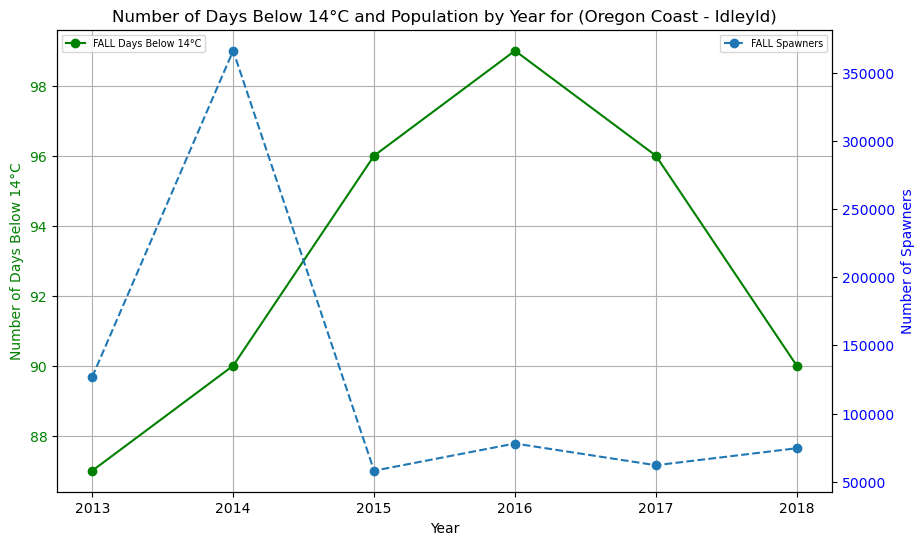

In [23]:
# Plot Number of Days Below 14°C and Population by Year for the region Oregon Coast and site name -Idleyld
# Filter population data to REGION == Oregon Coast 
population_filtered = data_population_cleaned[
    data_population_cleaned['REGION'] == 'Oregon Coast'
]

# Filter temp data for the Oregon Coast region and Site Name containing "Idleyld" 
temperature_filtered = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Oregon Coast') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Idleyld'))
]

# Create a column for days below 14 degrees C
temperature_filtered['Below_14_Days'] = temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14

# Group both datasets by YEAR and RUN_TIMING
population_grouped = population_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'NUMBER_OF_SPAWNERS': 'sum'
}).reset_index()

temperature_grouped = temperature_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'Below_14_Days': 'sum'
}).reset_index()

# Merge the population and temperature data on YEAR and RUN_TIMING
merged_data1 = pd.merge(population_grouped, temperature_grouped, on=['YEAR', 'RUN_TIMING'])

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of days below 14 degrees on the left y-axis
for season in merged_data1['RUN_TIMING'].unique():
    seasonal_data = merged_data1[merged_data1['RUN_TIMING'] == season]
    ax1.plot(seasonal_data['YEAR'], seasonal_data['Below_14_Days'], marker='o', color='green', label=f'{season} Days Below 14°C')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Days Below 14°C', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left', fontsize='x-small')
ax1.grid(True)

# Create a secondary y-axis for the number of spawners
ax2 = ax1.twinx()

# Plot the number of spawners on the right y-axis
for season in merged_data1['RUN_TIMING'].unique():
    seasonal_data = merged_data1[merged_data1['RUN_TIMING'] == season]
    ax2.plot(seasonal_data['YEAR'], seasonal_data['NUMBER_OF_SPAWNERS'], marker='o', linestyle='--', label=f'{season} Spawners')

ax2.set_ylabel('Number of Spawners', color='blue')
ax2.legend(loc='upper right', fontsize='x-small')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Number of Days Below 14°C and Population by Year for (Oregon Coast - Idleyld)')
plt.show()



In [24]:
# Create table showing graph totals 
# Filter the temperature data for Oregon Coast and site containing 'Idleyld'
filtered_temperature_data = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Oregon Coast') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Idleyld')) &
    (data_temperature_cleaned['RUN_TIMING'] == 'FALL')
]

# Filter the population data for Oregon Coast and 'FALL' run timing
filtered_population_data = data_population_cleaned[
    (data_population_cleaned['REGION'] == 'Oregon Coast') &
    (data_population_cleaned['RUN_TIMING'] == 'FALL')
]

# Calculate total days below 14°C per year
below_14_degrees = filtered_temperature_data[filtered_temperature_data['DAILY_MEAN_WATER_TEMP'] < 14]
days_below_14 = below_14_degrees.groupby('YEAR').size().reset_index(name='total_days_below_14')

# Calculate total number of spawners per year
total_fall_spawners = filtered_population_data.groupby('YEAR')['NUMBER_OF_SPAWNERS'].sum().reset_index(name='total_fall_spawners')

# Merge the two datasets on 'YEAR'
summary_table = pd.merge(days_below_14, total_fall_spawners, on='YEAR', how='inner')

# Display the summary table
summary_table


,YEAR,total_days_below_14,total_fall_spawners
0,2013,87,126878.0
1,2014,90,366000.0
2,2015,96,58106.0
3,2016,99,78056.0
4,2017,96,62124.0
5,2018,90,74591.0


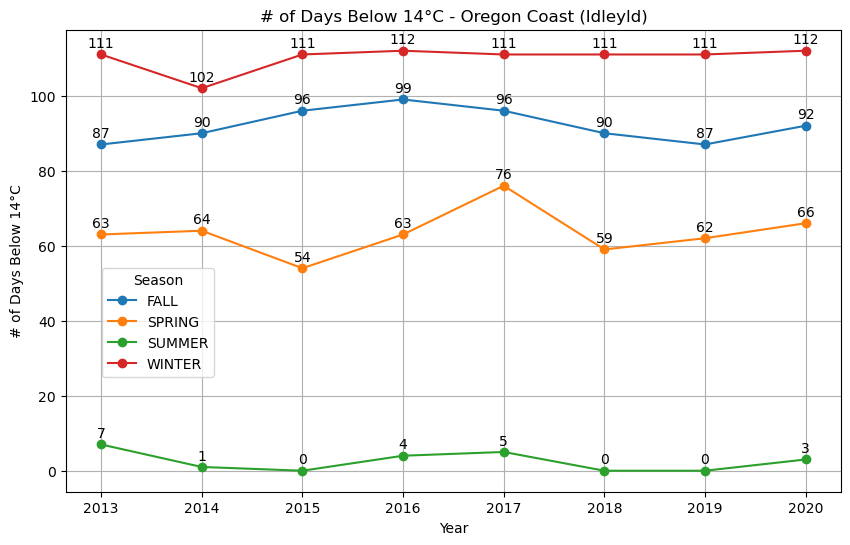

In [25]:
# Plot number of days below 14 degrees by season for the Region-Oregon Coast and site name-Idleyld 
# Filter data for Oregon Coast region and SITE NAME containing 'Idleyld'
filtered_temperature_data = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Oregon Coast') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Idleyld')) &
    (data_temperature_cleaned['YEAR'] <= 2020)  # Limit to 2020 and earlier
]

# Calculate the number of days where DAILY_MEAN_WATER_TEMP is below 14C, grouped by YEAR and RUN_TIMING 
below_14_degrees = filtered_temperature_data[filtered_temperature_data['DAILY_MEAN_WATER_TEMP'] < 14]
days_below_14 = below_14_degrees.groupby(['YEAR', 'RUN_TIMING']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot lines for each season 
for season in days_below_14.columns:
    plt.plot(days_below_14.index, days_below_14[season], marker='o', label=season)  # Marker for each year

# Add corresponding value to each point 
for season in days_below_14.columns:
    for i in range(len(days_below_14)):
        plt.annotate(f"{int(days_below_14[season].iloc[i])}",  # Add value for each year
                     (days_below_14.index[i], days_below_14[season].iloc[i]),
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Add titles and labels
plt.title("# of Days Below 14°C - Oregon Coast (Idleyld)")
plt.xlabel("Year")
plt.ylabel("# of Days Below 14°C")
plt.legend(title="Season", bbox_to_anchor=(0.2,0.5))
plt.grid(True)

# Show the plot
plt.show()

In [26]:
# Show graph statistics 
summary_statistics_table = days_below_14.describe()
print(summary_statistics_table)


RUN_TIMING       FALL     SPRING    SUMMER      WINTER
count        8.000000   8.000000  8.000000    8.000000
mean        92.125000  63.375000  2.500000  110.125000
std          4.454131   6.277795  2.672612    3.313932
min         87.000000  54.000000  0.000000  102.000000
25%         89.250000  61.250000  0.000000  111.000000
50%         91.000000  63.000000  2.000000  111.000000
75%         96.000000  64.500000  4.250000  111.250000
max         99.000000  76.000000  7.000000  112.000000


WILLAMETTE (EUGUENE)

/var/folders/w1/kv9m74sx7rn3jh6fkm7wrzrc0000gp/T/ipykernel_58360/2787122304.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_temperature_filtered['Below_14_Days'] = w_temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14


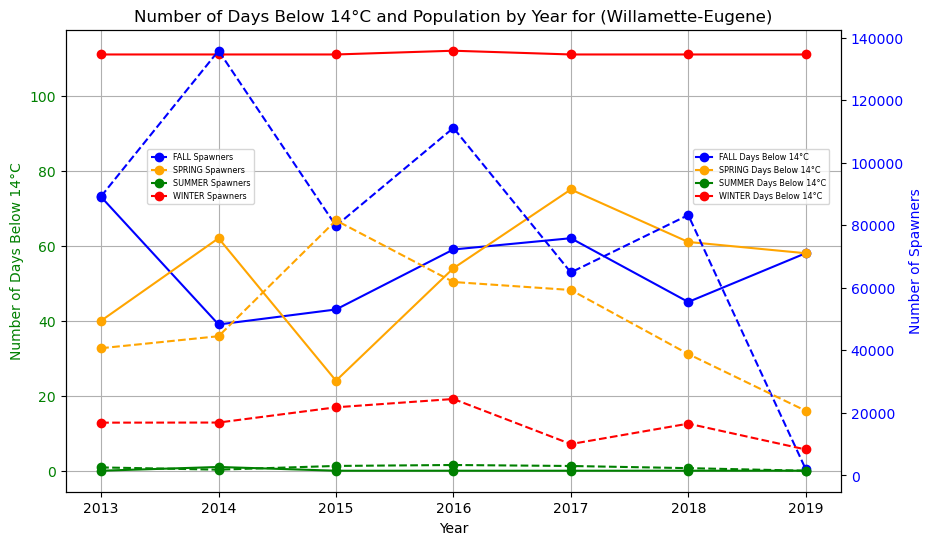

In [27]:
#Plot Number of Days Below 14°C and Total Population by Year for the region Willamette at the site name Eugene
# Filter population data to REGION 
w_population_filtered = data_population_cleaned[
    data_population_cleaned['REGION'] == 'Willamette/Lower Columbia'
]

# Filter temp data for Site Name 
w_temperature_filtered = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Willamette/Lower Columbia') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Eugene'))
]

# Create a column for days below 14 degrees C
w_temperature_filtered['Below_14_Days'] = w_temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14

# Group both datasets by YEAR and RUN_TIMING
w_population_grouped = w_population_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'NUMBER_OF_SPAWNERS': 'sum'
}).reset_index()

w_temperature_grouped = w_temperature_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'Below_14_Days': 'sum'
}).reset_index()

# Merge the population and temperature data on YEAR and RUN_TIMING
merged_data2 = pd.merge(w_population_grouped, w_temperature_grouped, on=['YEAR', 'RUN_TIMING'])

# Plot
colors = {
    'FALL': 'blue',
    'SPRING': 'orange',
    'SUMMER': 'green',
    'WINTER': 'red'
}

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of days below 14 degrees on the left y-axis
for season in merged_data2['RUN_TIMING'].unique():
    w_seasonal_data = merged_data2[merged_data2['RUN_TIMING'] == season]
    ax1.plot(w_seasonal_data['YEAR'], w_seasonal_data['Below_14_Days'], marker='o', color=colors[season], label=f'{season} Days Below 14°C')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Days Below 14°C', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(bbox_to_anchor=(0.99,0.75), fontsize='xx-small')
ax1.grid(True)

# Create a secondary y-axis for the number of spawners
ax2 = ax1.twinx()

# Plot the number of spawners on the right y-axis
for season in merged_data2['RUN_TIMING'].unique():
    w_seasonal_data = merged_data2[merged_data2['RUN_TIMING'] == season]
    ax2.plot(w_seasonal_data['YEAR'], w_seasonal_data['NUMBER_OF_SPAWNERS'], marker='o', linestyle='--',color=colors[season], label=f'{season} Spawners')

ax2.set_ylabel('Number of Spawners', color='blue')
ax2.legend(bbox_to_anchor=(0.1,0.75), fontsize='xx-small')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Number of Days Below 14°C and Population by Year for (Willamette-Eugene)')
plt.show()

In [28]:
#Show graph totals 
eugene_totals = merged_data2.groupby(['RUN_TIMING', 'YEAR']).sum()
eugene_totals


NUMBER_OF_SPAWNERS  Below_14_Days
RUN_TIMING YEAR                                   
FALL       2013             89247.0             73
           2014            135787.0             39
           2015             79787.0             43
           2016            111107.0             59
           2017             64903.0             62
           2018             83239.0             45
           2019              2020.0             58
SPRING     2013             40675.0             40
           2014             44508.0             62
           2015             81540.0             24
           2016             61842.0             54
           2017             59288.0             75
           2018             38817.0             61
           2019             20669.0             58
SUMMER     2013              2560.0              0
           2014              1842.0              1
           2015              3033.0              0
           2016              3334.0              0
           2017              3017.0              0
           2018              2330.0              0
           2019              1503.0              0
WINTER     2013             16873.0            111
           2014             16905.0            111
           2015             21781.0            111
           2016             24441.0            112
           2017             10026.0            111
           2018             16554.0            111
           2019              8299.0            111

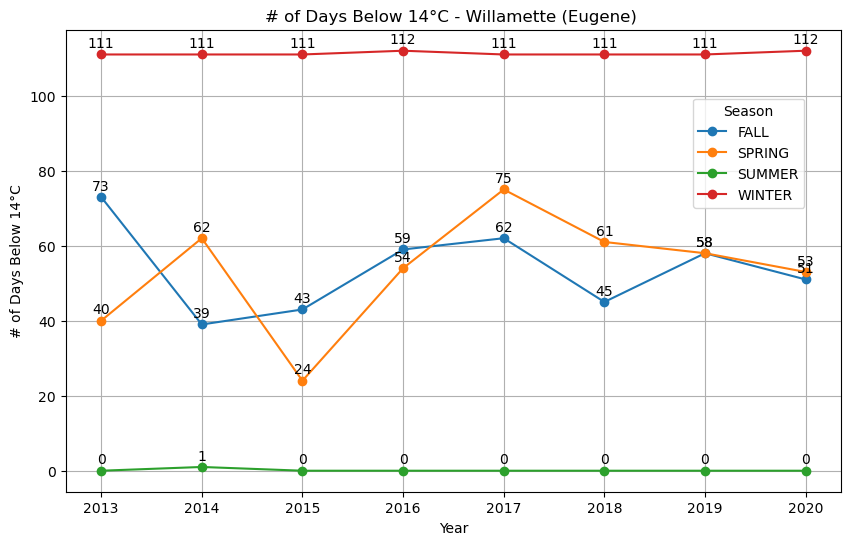

In [29]:
# Plot number of days below 14 degrees by season for the Region Willamette at the site name Eugene 
# Filter data 
w_filtered_temperature_data = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Willamette/Lower Columbia') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Eugene')) &
    (data_temperature_cleaned['YEAR'] <= 2020) 
]

# Calculate the number of days where DAILY_MEAN_WATER_TEMP is below 14C, grouped by YEAR and RUN_TIMING 
w_below_14_degrees = w_filtered_temperature_data[w_filtered_temperature_data['DAILY_MEAN_WATER_TEMP'] < 14]
w_days_below_14 = w_below_14_degrees.groupby(['YEAR', 'RUN_TIMING']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot lines for each season and show dots/values only at each year
for season in w_days_below_14.columns:
    plt.plot(w_days_below_14.index, w_days_below_14[season], marker='o', label=season)  # Marker for each year

# Add corresponding value to each point 
for season in w_days_below_14.columns:
    for i in range(len(w_days_below_14)):
        plt.annotate(f"{int(w_days_below_14[season].iloc[i])}",  # Add value for each year
                     (w_days_below_14.index[i], w_days_below_14[season].iloc[i]),
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Add titles and labels
plt.title("# of Days Below 14°C - Willamette (Eugene) ")
plt.xlabel("Year")
plt.ylabel("# of Days Below 14°C")
plt.legend(title="Season", bbox_to_anchor=(0.8,0.6))
plt.grid(True)

# Show the plot
plt.show()

In [30]:
#Show graph statistics 
eugene_summary_statistics_table = w_days_below_14.describe()
print(eugene_summary_statistics_table)

RUN_TIMING       FALL     SPRING    SUMMER     WINTER
count        8.000000   8.000000  8.000000    8.00000
mean        53.750000  53.375000  0.125000  111.25000
std         11.348379  15.417407  0.353553    0.46291
min         39.000000  24.000000  0.000000  111.00000
25%         44.500000  49.750000  0.000000  111.00000
50%         54.500000  56.000000  0.000000  111.00000
75%         59.750000  61.250000  0.000000  111.25000
max         73.000000  75.000000  1.000000  112.00000


Interior Columbia (ClearWater)

/var/folders/w1/kv9m74sx7rn3jh6fkm7wrzrc0000gp/T/ipykernel_58360/412079275.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_temperature_filtered['Below_14_Days'] = w_temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14


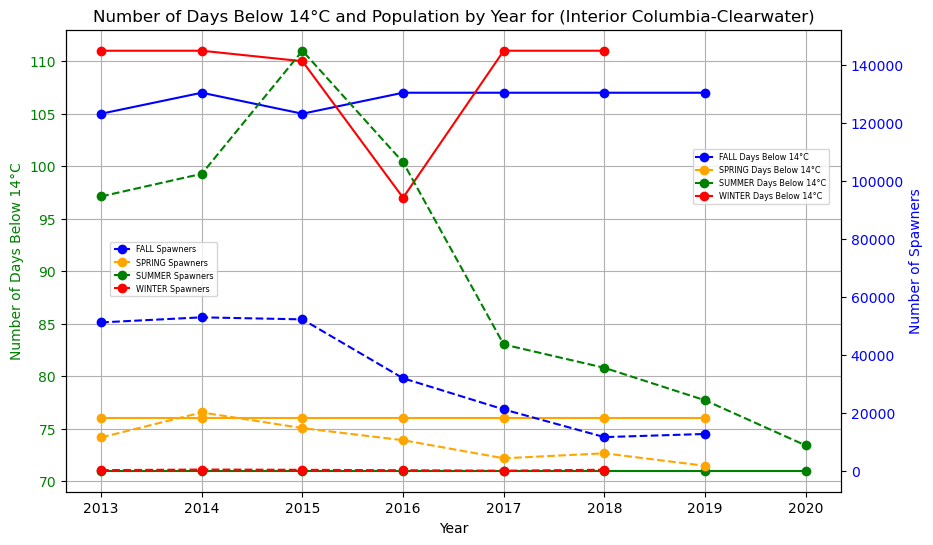

In [31]:
#Plot Number of Days Below 14°C and Total Population by Year for (Interior Columbia-Clearwater)
# Filter population data to REGION 
w_population_filtered = data_population_cleaned[
    data_population_cleaned['REGION'] == 'Interior Columbia'
]

# Filter temp data for Site Name 
w_temperature_filtered = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Interior Columbia') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Clearwater'))
]

# Create a column for days below 14 degrees C
w_temperature_filtered['Below_14_Days'] = w_temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14

# Group both datasets by YEAR and RUN_TIMING
w_population_grouped = w_population_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'NUMBER_OF_SPAWNERS': 'sum'
}).reset_index()

w_temperature_grouped = w_temperature_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'Below_14_Days': 'sum'
}).reset_index()

# Merge the population and temperature data on YEAR and RUN_TIMING
merged_data2 = pd.merge(w_population_grouped, w_temperature_grouped, on=['YEAR', 'RUN_TIMING'])

# Plot
colors = {
    'FALL': 'blue',
    'SPRING': 'orange',
    'SUMMER': 'green',
    'WINTER': 'red'
}

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of days below 14 degrees on the left y-axis
for season in merged_data2['RUN_TIMING'].unique():
    w_seasonal_data = merged_data2[merged_data2['RUN_TIMING'] == season]
    ax1.plot(w_seasonal_data['YEAR'], w_seasonal_data['Below_14_Days'], marker='o', color=colors[season], label=f'{season} Days Below 14°C')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Days Below 14°C', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(bbox_to_anchor=(0.99,0.75), fontsize='xx-small')
ax1.grid(True)

# Create a secondary y-axis for the number of spawners
ax2 = ax1.twinx()

# Plot the number of spawners on the right y-axis
for season in merged_data2['RUN_TIMING'].unique():
    w_seasonal_data = merged_data2[merged_data2['RUN_TIMING'] == season]
    ax2.plot(w_seasonal_data['YEAR'], w_seasonal_data['NUMBER_OF_SPAWNERS'], marker='o', linestyle='--',color=colors[season], label=f'{season} Spawners')

ax2.set_ylabel('Number of Spawners', color='blue')
ax2.legend(bbox_to_anchor=(0.2,0.55), fontsize='xx-small')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Number of Days Below 14°C and Population by Year for (Interior Columbia-Clearwater)')
plt.show()

In [32]:
# Show graph totals 
clearwater_totals = merged_data2.groupby(['RUN_TIMING', 'YEAR']).sum()
clearwater_totals

NUMBER_OF_SPAWNERS  Below_14_Days
RUN_TIMING YEAR                                   
FALL       2013             51239.0            105
           2014             52989.0            107
           2015             52285.0            105
           2016             31993.0            107
           2017             21248.0            107
           2018             11705.0            107
           2019             12790.0            107
SPRING     2013             11594.0             76
           2014             20215.0             76
           2015             14805.0             76
           2016             10634.0             76
           2017              4405.0             76
           2018              6123.0             76
           2019              1814.0             76
SUMMER     2013             94656.0             71
           2014            102451.0             71
           2015            144880.0             71
           2016            106428.0             71
           2017             43630.0             71
           2018             35590.0             71
           2019             24400.0             71
           2020              8842.0             71
WINTER     2013               311.0            111
           2014               525.0            111
           2015               432.0            110
           2016               286.0             97
           2017               120.0            111
           2018               471.0            111

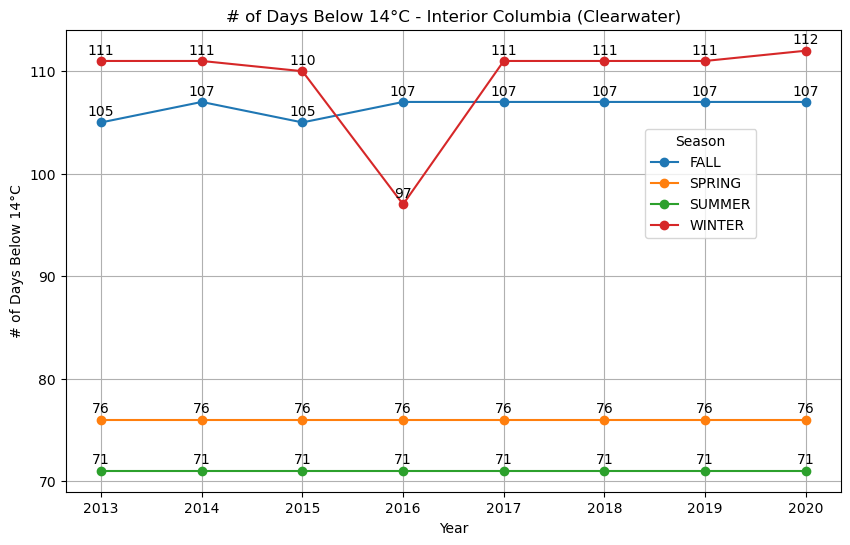

In [33]:
# Plot number of days below 14 degrees by season for Interior Columbia (Clearwater)
# Filter data 
w_filtered_temperature_data = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Interior Columbia') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Clearwater')) &
    (data_temperature_cleaned['YEAR'] <= 2020) 
]

# Calculate the number of days where DAILY_MEAN_WATER_TEMP is below 14C, grouped by YEAR and RUN_TIMING 
w_below_14_degrees = w_filtered_temperature_data[w_filtered_temperature_data['DAILY_MEAN_WATER_TEMP'] < 14]
w_days_below_14 = w_below_14_degrees.groupby(['YEAR', 'RUN_TIMING']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot lines for each season and show dots/values only at each year
for season in w_days_below_14.columns:
    plt.plot(w_days_below_14.index, w_days_below_14[season], marker='o', label=season)  # Marker for each year

# Add corresponding value to each point 
for season in w_days_below_14.columns:
    for i in range(len(w_days_below_14)):
        plt.annotate(f"{int(w_days_below_14[season].iloc[i])}",  # Add value for each year
                     (w_days_below_14.index[i], w_days_below_14[season].iloc[i]),
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Add titles and labels
plt.title("# of Days Below 14°C - Interior Columbia (Clearwater)")
plt.xlabel("Year")
plt.ylabel("# of Days Below 14°C")
plt.legend(title="Season", bbox_to_anchor=(0.9,0.8))
plt.grid(True)

# Show the plot
plt.show()

In [34]:
# show graph statistics 
clearwater_summary_statistics_table = w_days_below_14.describe()
print(clearwater_summary_statistics_table)

RUN_TIMING       FALL  SPRING  SUMMER      WINTER
count         8.00000     8.0     8.0    8.000000
mean        106.50000    76.0    71.0  109.250000
std           0.92582     0.0     0.0    4.978525
min         105.00000    76.0    71.0   97.000000
25%         106.50000    76.0    71.0  110.750000
50%         107.00000    76.0    71.0  111.000000
75%         107.00000    76.0    71.0  111.000000
max         107.00000    76.0    71.0  112.000000


INTERIOR COLUMBIA (SNAKE)

/var/folders/w1/kv9m74sx7rn3jh6fkm7wrzrc0000gp/T/ipykernel_58360/2979575892.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_temperature_filtered['Below_14_Days'] = w_temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14


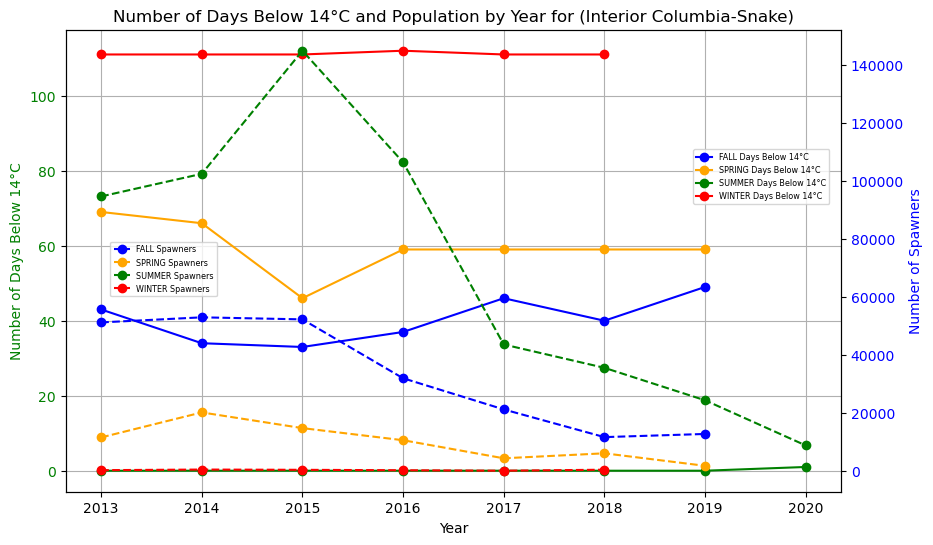

In [35]:
# Plot Number of Days Below 14°C and total Population by Year for (Interior Columbia-Snake)
# Filter population data to REGION 
w_population_filtered = data_population_cleaned[
    data_population_cleaned['REGION'] == 'Interior Columbia'
]

# Filter temp data for Site Name 
w_temperature_filtered = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Interior Columbia') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Snake'))
]

# Create a column for days below 14 degrees C
w_temperature_filtered['Below_14_Days'] = w_temperature_filtered['DAILY_MEAN_WATER_TEMP'] < 14

# Group both datasets by YEAR and RUN_TIMING
w_population_grouped = w_population_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'NUMBER_OF_SPAWNERS': 'sum'
}).reset_index()

w_temperature_grouped = w_temperature_filtered.groupby(['YEAR', 'RUN_TIMING']).agg({
    'Below_14_Days': 'sum'
}).reset_index()

# Merge the population and temperature data on YEAR and RUN_TIMING
merged_data2 = pd.merge(w_population_grouped, w_temperature_grouped, on=['YEAR', 'RUN_TIMING'])

# Plot
colors = {
    'FALL': 'blue',
    'SPRING': 'orange',
    'SUMMER': 'green',
    'WINTER': 'red'
}

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of days below 14 degrees on the left y-axis
for season in merged_data2['RUN_TIMING'].unique():
    w_seasonal_data = merged_data2[merged_data2['RUN_TIMING'] == season]
    ax1.plot(w_seasonal_data['YEAR'], w_seasonal_data['Below_14_Days'], marker='o', color=colors[season], label=f'{season} Days Below 14°C')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Days Below 14°C', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(bbox_to_anchor=(0.99,0.75), fontsize='xx-small')
ax1.grid(True)

# Create a secondary y-axis for the number of spawners
ax2 = ax1.twinx()

# Plot the number of spawners on the right y-axis
for season in merged_data2['RUN_TIMING'].unique():
    w_seasonal_data = merged_data2[merged_data2['RUN_TIMING'] == season]
    ax2.plot(w_seasonal_data['YEAR'], w_seasonal_data['NUMBER_OF_SPAWNERS'], marker='o', linestyle='--',color=colors[season], label=f'{season} Spawners')

ax2.set_ylabel('Number of Spawners', color='blue')
ax2.legend(bbox_to_anchor=(0.2,0.55), fontsize='xx-small')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Number of Days Below 14°C and Population by Year for (Interior Columbia-Snake)')
plt.show()

In [36]:
#Show graph statistics 
snake_totals = merged_data2.groupby(['RUN_TIMING', 'YEAR']).sum()
snake_totals

NUMBER_OF_SPAWNERS  Below_14_Days
RUN_TIMING YEAR                                   
FALL       2013             51239.0             43
           2014             52989.0             34
           2015             52285.0             33
           2016             31993.0             37
           2017             21248.0             46
           2018             11705.0             40
           2019             12790.0             49
SPRING     2013             11594.0             69
           2014             20215.0             66
           2015             14805.0             46
           2016             10634.0             59
           2017              4405.0             59
           2018              6123.0             59
           2019              1814.0             59
SUMMER     2013             94656.0              0
           2014            102451.0              0
           2015            144880.0              0
           2016            106428.0              0
           2017             43630.0              0
           2018             35590.0              0
           2019             24400.0              0
           2020              8842.0              1
WINTER     2013               311.0            111
           2014               525.0            111
           2015               432.0            111
           2016               286.0            112
           2017               120.0            111
           2018               471.0            111

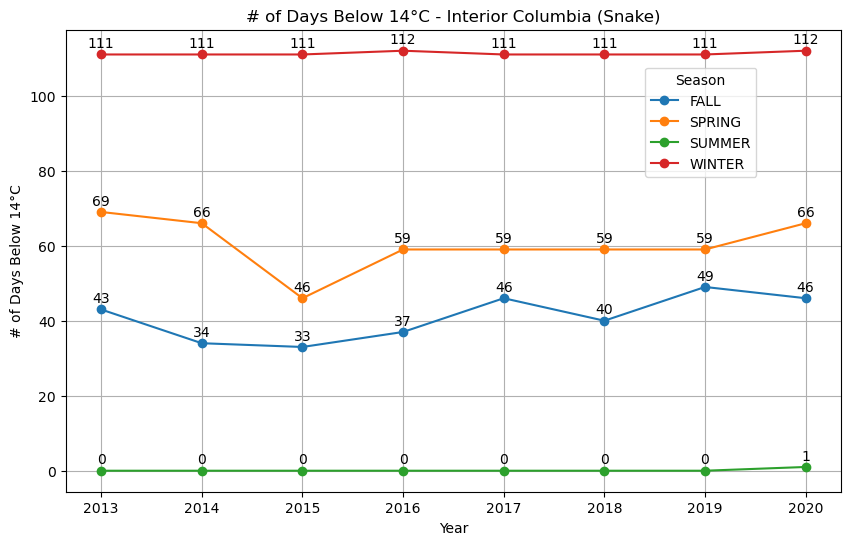

In [37]:
# Plot number of days below 14 degrees by season for Interior Columbia (Snake)
# Filter data 
w_filtered_temperature_data = data_temperature_cleaned[
    (data_temperature_cleaned['REGION'] == 'Interior Columbia') &
    (data_temperature_cleaned['SITE NAME'].str.contains('Snake')) &
    (data_temperature_cleaned['YEAR'] <= 2020) 
]

# Calculate the number of days where DAILY_MEAN_WATER_TEMP is below 14C, grouped by YEAR and RUN_TIMING 
w_below_14_degrees = w_filtered_temperature_data[w_filtered_temperature_data['DAILY_MEAN_WATER_TEMP'] < 14]
w_days_below_14 = w_below_14_degrees.groupby(['YEAR', 'RUN_TIMING']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot lines for each season and show dots/values only at each year
for season in w_days_below_14.columns:
    plt.plot(w_days_below_14.index, w_days_below_14[season], marker='o', label=season)  # Marker for each year

# Add corresponding value to each point 
for season in w_days_below_14.columns:
    for i in range(len(w_days_below_14)):
        plt.annotate(f"{int(w_days_below_14[season].iloc[i])}",  # Add value for each year
                     (w_days_below_14.index[i], w_days_below_14[season].iloc[i]),
                     textcoords="offset points", xytext=(0, 5), ha='center')

# Add titles and labels
plt.title("# of Days Below 14°C - Interior Columbia (Snake)")
plt.xlabel("Year")
plt.ylabel("# of Days Below 14°C")
plt.legend(title="Season", bbox_to_anchor=(0.9,0.8))
plt.grid(True)

# Show the plot
plt.show()

In [38]:
#show graph statistics 
snake_summary_statistics_table = w_days_below_14.describe()
print(snake_summary_statistics_table)

RUN_TIMING      FALL     SPRING    SUMMER     WINTER
count        8.00000   8.000000  8.000000    8.00000
mean        41.00000  60.375000  0.125000  111.25000
std          5.95219   7.089983  0.353553    0.46291
min         33.00000  46.000000  0.000000  111.00000
25%         36.25000  59.000000  0.000000  111.00000
50%         41.50000  59.000000  0.000000  111.00000
75%         46.00000  66.000000  0.000000  111.25000
max         49.00000  69.000000  1.000000  112.00000
